In [62]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency 
import matplotlib.pyplot as plt
import seaborn as sea

#import clean data
df = pd.read_csv("C:/Users/jhall/Desktop/D206/cleanedD206.csv")

#inspect data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9549 entries, 0 to 9548
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            9549 non-null   int64  
 1   CaseOrder             9549 non-null   int64  
 2   Customer_id           9549 non-null   object 
 3   Interaction           9549 non-null   object 
 4   City                  9549 non-null   object 
 5   State                 9549 non-null   object 
 6   County                9549 non-null   object 
 7   Zip                   9549 non-null   int64  
 8   Lat                   9549 non-null   float64
 9   Lng                   9549 non-null   float64
 10  Population            9549 non-null   int64  
 11  Area                  9549 non-null   object 
 12  Timezone              9549 non-null   object 
 13  Job                   9549 non-null   object 
 14  Children              9549 non-null   float64
 15  Age                  

In [63]:
#Create table with variable for area and churn
table = pd.crosstab(df.Area, df.Churn)
print(table)

Churn       No  Yes
Area               
Rural     2356  818
Suburban  2354  846
Urban     2299  876


In [64]:
#Chi test

chi2, p, dof, expected = chi2_contingency(table)

alpha = 0.05
if p < alpha:
    print("There is a significant association between the variables.")
else:
    print("There is no significant association between the variables.")
    
print("Expected frequencies:\n", expected)

There is no significant association between the variables.
Expected frequencies:
 [[2329.72730129  844.27269871]
 [2348.81139386  851.18860614]
 [2330.46130485  844.53869515]]


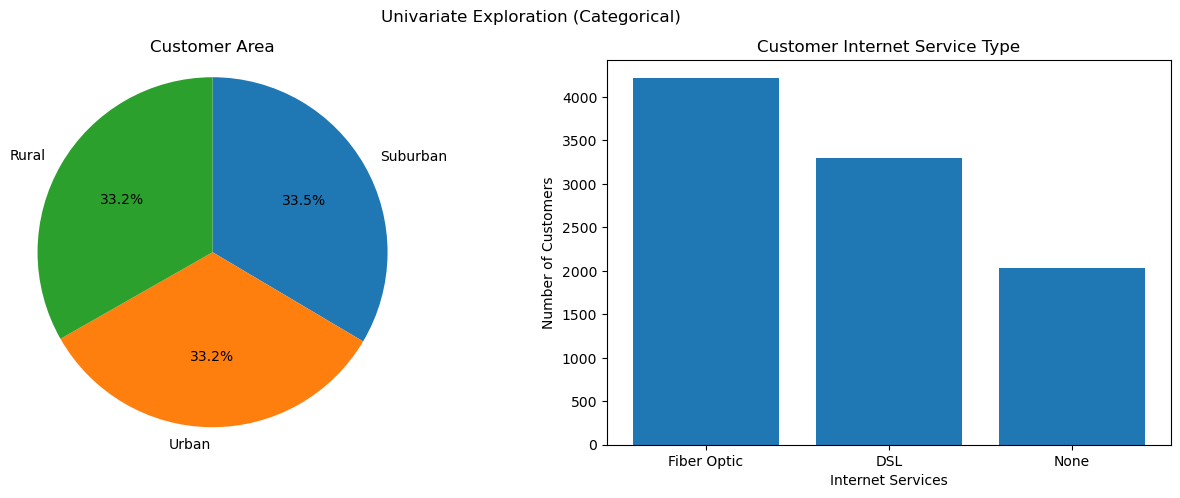

In [65]:
plt.figure(figsize = [16,5])
plt.suptitle("Univariate Exploration (Categorical)")

#Left graph: exploration of "Area"
plt.subplot(1, 2, 1)
plt.title("Customer Area")
area_counts = df["Area"].value_counts()
area_labels = ["Urban", "Suburban", "Rual"]
plt.pie(area_counts, labels=area_counts.index, autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

#Right Graph: exploration of "InternetService"
plt.subplot(1, 2, 2)
InternetService_count = df["InternetService"].value_counts()
InternetService_labels = ["Fiber Optic","DSL","None"]
plt.bar(InternetService_labels, InternetService_count)
plt.xlabel("Internet Services")
plt.ylabel("Number of Customers")
plt.title("Customer Internet Service Type");


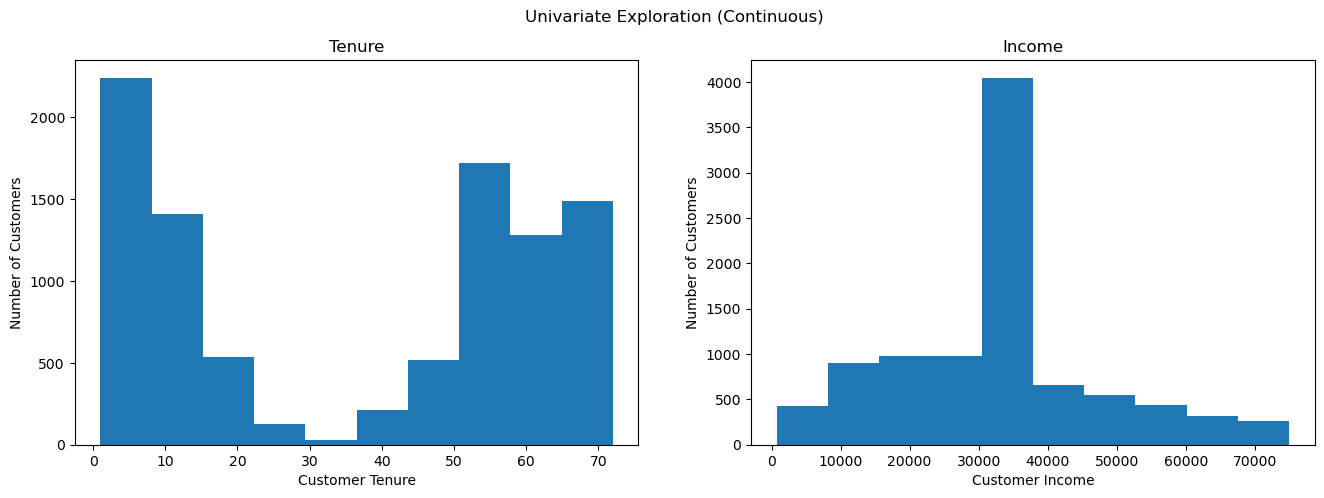

In [66]:
plt.figure(figsize = [16,5])
plt.suptitle("Univariate Exploration (Continuous)")

#Left Graph: Exploration of "Tenure"
plt.subplot(1, 2, 1)
plt.title("Tenure")
plt.hist(df["Tenure"])
plt.xlabel("Customer Tenure")
plt.ylabel("Number of Customers");

#Right Graph: Exploration of "Income"
plt.subplot(1, 2, 2)
plt.title("Income")
plt.hist(df["Income"])
plt.xlabel("Customer Income")
plt.ylabel("Number of Customers");


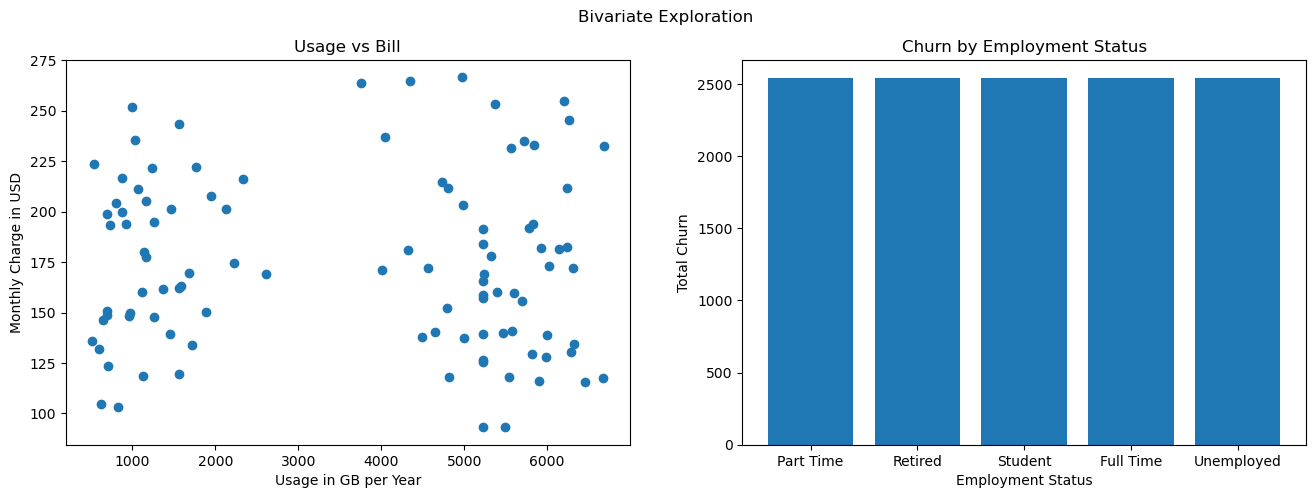

In [104]:
plt.figure(figsize =[16,5])
plt.suptitle("Bivariate Exploration")

#Left Graph: Exploration of Bandwidth Usage vs Monthly Bill
plt.subplot(1, 2, 1)
plt.title("Usage vs Bill")
plt.scatter(df["Bandwidth_GB_Year"].sample(100),df["MonthlyCharge"].sample(100));
plt.xlabel("Usage in GB per Year")
plt.ylabel("Monthly Charge in USD")

#Right Graph: Employment vs Churn
plt.subplot(1, 2, 2)
plt.title("Churn by Employment Status")
plt.bar(df["Employment"], df["Churn"].eq("Yes").sum() )
plt.xlabel("Employment Status")
plt.ylabel("Total Churn");